In [ ]:
import pandas as pd
# load csv of survey responses

responses = pd.read_csv("../raw/user_eval.csv")

In [ ]:
# store original column values
original_cols = responses.columns

# rename columns for ease of access
responses.columns = ["time", "ethics", "be1", "be2", "be3", "be4", "tech", 
                     "adblock", "name", "completed", "solo", "reason", "details","skip",
                     "af1", "af2", "af3", "af4", "add1", "ev1", "ev2", "ev3",
                     "ev4", "ev5", "ev6", "ev7", "ev8", "ev9", "ev10", "add2",
                     "add3"]

In [ ]:
responses

,time,ethics,be1,be2,be3,be4,tech,adblock,name,completed,solo,reason,details,skip,af1,af2,af3,af4,add1,ev1,ev2,ev3,ev4,ev5,ev6,ev7,ev8,ev9,ev10,add2,add3
0,2/28/2021 13:49:24,You agree to take part in the survey and that ...,Social media websites such as Facebook,4,4,4,4,Yes,youngfinio,Yes,No,NaN,NaN,NaN,News or blog websites such as The Guardian,5,4,5,NaN,3,2,4,2,4,2,4,2,3,4,NaN,NaN
1,2/28/2021 13:55:24,You agree to take part in the survey and that ...,News or blog websites such as The Guardian,3,4,4,4,Yes,pierakis,Yes,No,NaN,NaN,NaN,News or blog websites such as The Guardian,5,4,4,The fact that as soon as you accept cookies yo...,4,2,5,1,5,2,5,2,5,2,NaN,Interesting game. Had a fun time playing the m...
2,2/28/2021 13:56:46,You agree to take part in the survey and that ...,Streaming websites such as YouTube or Netflix,4,4,3,5,Yes,finio98,Yes,No,NaN,NaN,NaN,News or blog websites such as The Guardian,4,4,4,Very interesting application. Only couple of t...,4,2,4,1,4,1,4,2,3,4,Good luck!,NaN
3,3/2/2021 21:10:32,You agree to take part in the survey and that ...,News or blog websites such as The Guardian,4,3,2,4,Yes,jack97,Yes,Yes,NaN,NaN,NaN,News or blog websites such as The Guardian,4,3,2,NaN,3,1,5,1,4,1,5,1,5,1,NaN,NaN
4,3/3/2021 15:32:14,You agree to take part in the survey and that ...,E-commerce websites such as Amazon,5,5,5,5,Yes,modelorona,Yes,Yes,NaN,NaN,NaN,News or blog websites such as The Guardian,5,5,5,NaN,4,1,5,1,5,1,5,1,4,1,NaN,NaN
5,3/9/2021 18:34:08,You agree to take part in the survey and that ...,News or blog websites such as The Guardian,4,5,4,5,Yes,peetah,Yes,No,NaN,NaN,NaN,News or blog websites such as The Guardian,5,5,5,NaN,2,1,4,1,4,2,5,2,4,3,NaN,NaN
6,3/9/2021 18:34:09,You agree to take part in the survey and that ...,Streaming websites such as YouTube or Netflix,3,4,3,3,Yes,Ash,Yes,No,NaN,NaN,NaN,News or blog websites such as The Guardian,4,5,4,NaN,3,1,5,2,4,1,5,2,3,2,NaN,NaN
7,3/9/2021 18:34:13,You agree to take part in the survey and that ...,Social media websites such as Facebook,2,3,2,2,No,Rawar,Yes,No,NaN,NaN,NaN,News or blog websites such as The Guardian,5,4,4,NaN,4,1,4,1,5,2,4,1,4,4,NaN,NaN
8,3/9/2021 18:34:14,You agree to take part in the survey and that ...,E-commerce websites such as Amazon,2,2,3,2,Yes,Mortred,Yes,No,NaN,NaN,NaN,News or blog websites such as The Guardian,4,4,3,NaN,3,2,5,1,3,1,4,2,3,3,NaN,NaN


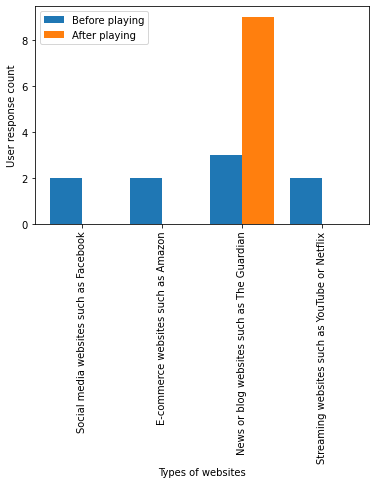

In [ ]:
# explore user knowledge
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# response options
possible_values = ["Social media websites such as Facebook", 
                   "E-commerce websites such as Amazon",
                   "News or blog websites such as The Guardian",
                   "Streaming websites such as YouTube or Netflix"]

# count number of responses for each option 
# before and after playing the game
before_website = [list(responses["be1"].values).count(res) for res in possible_values]
after_website = [list(responses["af1"].values).count(res) for res in possible_values]

# use to offset bars
x_tick_offset = np.arange(len(possible_values))

# plot the bars
plt.bar(x_tick_offset-0.2, before_website, 0.4)
plt.bar(x_tick_offset+0.2, after_website, 0.4)
plt.legend(["Before playing", "After playing"])
plt.xlabel("Types of websites")
plt.ylabel("User response count")
plt.xticks(x_tick_offset, possible_values, rotation = 90)
plt.show()

In [ ]:
from IPython.display import display, HTML
# select only the columns for the knowledge questions
filtered = responses[["tech","be2","be3","be4","af2","af3","af4","adblock"]]

# rename columns
filtered.columns = ["Tech Proficiency", "Q1:Before","Q1:After", "Q2:Before","Q2:After", "Q3:Before", "Q3:After", "Uses Adblocker?"]
filtered.index = ["user_%d" % (i+1) for i in range(len(responses["name"].values))]
display(HTML(filtered.to_html()))
print("Questions:")
print("*Q1: How would you rate your knowledge of how trackers monitor the user's browsing activity and collect the user's data?")
print("*Q2: How would you rate your knowledge of what targeted advertising is and how it works?")
print("*Q3: How would you rate your knowledge of privacy issues in targeted advertising?")

,Tech Proficiency,Q1:Before,Q1:After,Q2:Before,Q2:After,Q3:Before,Q3:After,Uses Adblocker?
user_1,4,4,4,4,5,4,5,Yes
user_2,4,3,4,4,5,4,4,Yes
user_3,5,4,4,3,4,4,4,Yes
user_4,4,4,3,2,4,3,2,Yes
user_5,5,5,5,5,5,5,5,Yes
user_6,5,4,5,4,5,5,5,Yes
user_7,3,3,4,3,4,5,4,Yes
user_8,2,2,3,2,5,4,4,No
user_9,2,2,2,3,4,4,3,Yes


Questions:
*Q1: How would you rate your knowledge of how trackers monitor the user's browsing activity and collect the user's data?
*Q2: How would you rate your knowledge of what targeted advertising is and how it works?
*Q3: How would you rate your knowledge of privacy issues in targeted advertising?


In [ ]:
# System usability
# extract data from dataframe
usability_data = responses[["ev%d" % (i+1) for i in range(10)]]

# rename columns and rows
usability_data.columns = ["Q%d" % (i+1) for i in range(10)]
usability_data.index = ["user_%d" % (i+1) for i in range(len(responses['name'].values))]

# show table in html format
display(HTML(usability_data.to_html()))

# Questions
print("Questions:")

for i, q in enumerate(original_cols[19:-2]):
  print("*Q%d: %s" % (i+1, q))

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
user_1,3,2,4,2,4,2,4,2,3,4
user_2,4,2,5,1,5,2,5,2,5,2
user_3,4,2,4,1,4,1,4,2,3,4
user_4,3,1,5,1,4,1,5,1,5,1
user_5,4,1,5,1,5,1,5,1,4,1
user_6,2,1,4,1,4,2,5,2,4,3
user_7,3,1,5,2,4,1,5,2,3,2
user_8,4,1,4,1,5,2,4,1,4,4
user_9,3,2,5,1,3,1,4,2,3,3


Questions:
*Q1: I think that I would like to use this system frequently.
*Q2: I found the system unnecessarily complex.
*Q3: I thought the system was easy to use.
*Q4: I think that I would need the support of a technical person to be able to use this system.
*Q5: I found the various functions in this system were well integrated.
*Q6: I thought there was too much inconsistency in this system.
*Q7: I would imagine that most people would learn to use this system very quickly.
*Q8: I found the system very cumbersome to use.
*Q9: I felt very confident using the system.
*Q10: I needed to learn a lot of things before I could get going with this system.


In [ ]:
# SUS score
positive_q = ["Q1","Q3","Q5","Q7","Q9"]
negative_q = ["Q2","Q4","Q6","Q8","Q10"]

# X = Sum of the points for all odd-numbered questions – 5
# Y = 25 – Sum of the points for all even-numbered questions
# SUS Score = (X + Y) x 2.5

# First look at the SUS score for each user
sus_total = 0
for i in range(len(usability_data)):
  user_response = usability_data.iloc[i]

  # calculate positive and negative scores as per the formula
  pos_score = np.sum(user_response[positive_q].values) - 5
  neg_score = 25 - np.sum(user_response[negative_q].values)

  sus = (pos_score + neg_score) * 2.5
  sus_total+=sus
  print("SUS score for user_%d is: %.2f" % (i+1, sus))

print("Average SUS score accross all users: %.2f" % (sus_total / len(usability_data)))

SUS score for user_1 is: 65.00
SUS score for user_2 is: 87.50
SUS score for user_3 is: 72.50
SUS score for user_4 is: 92.50
SUS score for user_5 is: 95.00
SUS score for user_6 is: 75.00
SUS score for user_7 is: 80.00
SUS score for user_8 is: 80.00
SUS score for user_9 is: 72.50
Average SUS score accross all users: 80.00


In [ ]:
# explore game history
import json

def print_page_history(game, category="Race"):
  if game["game_mode"] != category:
    return
  
  print("Winner: %s | Condition: %s" % (game["winner_name"], json.loads(game["game_stats"])["win_condition"]))

  df_index = "page_history" if category=="Race" else "history"

  player_stats = json.loads(game["player_stats"])
  for player, metrics in player_stats.items():
    print(player)
    for i, page in enumerate(metrics[df_index]):
      print("%d. %s" % (i, page))

  print("--------------------------------------------")

game_history = pd.read_csv("../raw/game_history.csv")

print("Race Mode Analysis: ")
game_history.apply(lambda game: print_page_history(game), axis=1)

print("Category Mode Analysis: ")
game_history.apply(lambda game: print_page_history(game, "Category"), axis=1)

Race Mode Analysis: 
Winner: finio98 | Condition: 50
finio98
0. fmnetwork.nl
1. www.google.com
2. sportlemons.net
3. www.youtube.com
4. ads.pubmatic.com
5. www.ronaldo7.net
6. platform.twitter.com
7. ssum.casalemedia.com
pierakis
0. www.xnxx.com
1. www.google.com
2. www.gamestop.eu
3. www.pornhub.com
4. www.amazon.co.uk
5. ads.trafficjunky.net
youngfinio
0. www.google.com
1. www.netflix.com
2. www.amazon.co.uk
3. www.google.co.uk
--------------------------------------------
Winner: finio98 | Condition: 200
finio98
0. d.agkn.com
1. a.adtng.com
2. u.openx.net
3. ap.lijit.com
4. hqporner.com
5. www.fark.com
6. eb2.3lift.com
7. acdn.adnxs.com
8. chaturbate.com
9. rtb.gumgum.com
10. www.google.com
11. www.porn00.org
12. sportlemons.net
13. www.news.com.au
14. www.youtube.com
15. ads.pubmatic.com
16. www.facebook.com
17. www.ronaldo7.net
18. www.dailymail.co.uk
19. platform.twitter.com
20. ssum.casalemedia.com
21. imasdk.googleapis.com
22. newscorpau.demdex.net
23. eus.rubiconproject.com
24.

0    None
1    None
2    None
3    None
4    None
5    None
dtype: object